In [2]:
'''Make figures of feature decoding results.'''


import argparse
import os

import bdpy
from bdpy.fig import makeplots
from bdpy.util import makedir_ifnot
import matplotlib.pyplot as plt
import pandas as pd
import yaml


In [3]:
# Settings #######################################################
conf_file = "config/recon_vggsound_attention_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = './derivatives/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
#quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

#print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects: {}".format(subjects))
print("ROIs:     {}".format(rois))
print("Layers:   {}".format(layers))
print("Eval feats: {}".format(eval_feats))
#quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = aud_quality_df
#quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Audio feature qaultiy filepath: ./derivatives/recon_features_attention/specvqgan/decoded/sound_originals/melception/quality_audiofeature.pkl.gz
Subjects: ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:     ['ACT']
Layers:   ['conv5_3']
Eval feats: ['f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,distance for attend,distance for unattend,identification accuracy
0,conv5_3,S1,ACT,f0,"[nan, nan, 607.4304912172998, 510.666348940403...","[nan, nan, 28.802271219334585, 34.719809556461...","[nan, nan, 0.0, 0.0, 0.0, nan, 0.0, 1.0, 1.0, ..."
1,conv5_3,S1,ACT,hnr,"[1.2294881312428858, 0.9403761686875747, 0.886...","[1.4760547532939077, 3.178441514730696, 4.0245...","[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, ..."
2,conv5_3,S1,ACT,sc,"[1016.1735164467509, 128.07224204383215, 330.9...","[1379.3323391960857, 298.1275064093577, 79.547...","[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
3,conv5_3,S2,ACT,f0,"[162.7759343274012, 371.0353731375435, 123.139...","[540.2816257863202, 337.0629066165192, 94.9243...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
4,conv5_3,S2,ACT,hnr,"[1.8961719376388806, 2.0333663387072316, 0.908...","[5.58972343675547, 5.832934039740877, 3.777492...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,conv5_3,S2,ACT,sc,"[100.50524363851127, 351.22563998531086, 483.1...","[535.4521876418091, 366.15449686106217, 991.19...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
6,conv5_3,S3,ACT,f0,"[332.0055424378603, 179.04740562660342, 20.371...","[371.05201767586107, 145.0749391055791, 7.8444...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
7,conv5_3,S3,ACT,hnr,"[1.953622209773496, 0.8714715682927743, 2.8224...","[5.647173708890085, 4.671039269326419, 5.69172...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,conv5_3,S3,ACT,sc,"[770.971719377802, 896.9951115078893, 379.7098...","[1406.9291506581224, 179.61497466151627, 128.3...","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
9,conv5_3,S4,ACT,f0,"[383.5405826912705, 347.26554403105536, 221.65...","[319.51697742245085, 313.293077510031, 193.434...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."


In [7]:
# Creating figures #######################################################

# Profile correlation
figs = makeplots(
    quality_df,
    x='eval_feat', x_list=eval_feats,
    y='identification accuracy',
    group='subject', group_list=subjects,
    subplot='layer', subplot_list=layers,
    figure='layer', figure_list=layers,
    plot_type='swarm+box',
    horizontal=False,
    x_label='Evaluation Features', y_label='Identification accuracy',
    title='Subject',
    style='seaborn-bright',
    plot_size_auto=True, plot_size=(2, 3), #max_col=2,
    y_lim=[0.3, 0.9], y_ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    chance_level=0.5, chance_level_style={'color': 'black', 'linewidth': 1}
)
for i, fig in enumerate(figs):
    os.makedirs(output_dir, exist_ok = True)
    save_filename = os.path.join(output_dir, 'recon_attention_identification-accuracy.pdf')
    fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
    print('Saved {}'.format(save_filename))
    save_filename = os.path.join(output_dir, 'recon_attention_identification-accuracy.png')
    fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
    print('Saved {}'.format(save_filename))
    plt.close(fig)


/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/bdpy/fig/makeplots.py:85: UserWarning: "grouping mode" is still experimental and will not work correctly yet!
  warnings.warn('"grouping mode" is still experimental and will not work correctly yet!')
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/bdpy/fig/makeplots.py:491: UserWarning: When grouping is True, "box_width" is not working to make the layout consistent with the swarm plot.
  warnings.warn('When grouping is True, "box_width" is not working to make the layout consistent with the swarm plot.')
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dni/mtanaka/.conda/envs/specvqgan/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 92.5% of the points cannot be placed; you ma

Saved ./derivatives/figures/recon_attention_identification-accuracy.pdf
Saved ./derivatives/figures/recon_attention_identification-accuracy.png


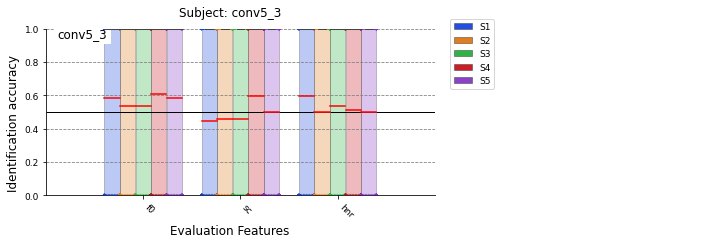

In [8]:
fig

In [ ]:


    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='profile correlation',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='violin',
        horizontal=True,
        x_label='Layer', y_label='Profile correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Pattern correlation
    figs = makeplots(
        perf_df,
        x='layer', x_list=features,
        y='pattern correlation',
        subplot='roi', subplot_list=rois,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_layers_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_layers_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='pattern correlation',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Identification
    figs = makeplots(
        perf_df,
        x='layer', x_list=features,
        y='identification accuracy',
        subplot='roi', subplot_list=rois,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_layers_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_layers_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    figs = makeplots(
        perf_df,
        x='roi', x_list=rois,
        y='identification accuracy',
        subplot='layer', subplot_list=features,
        figure='subject', figure_list=subjects,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='Subject',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_rois_subject-{}.pdf'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_rois_subject-{}.png'.format(subjects[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Creating figures (subject comparison) ##################################

    # Profile correlation
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='profile correlation',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='violin',
        horizontal=True,
        x_label='Layer', y_label='Profile correlation',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_profile-correlation_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Pattern correlation
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='pattern correlation',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pattern correlation',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[-0.6, 1], y_ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8],
        chance_level=0, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pattern-correlation_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    # Identification
    figs = makeplots(
        perf_df,
        x='subject', x_list=subjects,
        y='identification accuracy',
        subplot='layer', subplot_list=features,
        figure='roi', figure_list=rois,
        plot_type='swarm+box',
        horizontal=True,
        x_label='Layer', y_label='Pairwise identification accuracy',
        title='ROI',
        style='seaborn-bright',
        plot_size_auto=True, plot_size=(4, 0.3), max_col=2,
        y_lim=[0, 1], y_ticks=[0, 0.25, 0.5, 0.75, 1.0],
        chance_level=0.5, chance_level_style={'color': 'gray', 'linewidth': 1}
    )
    for i, fig in enumerate(figs):
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_all-subjects_roi-{}.pdf'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        save_filename = os.path.join(output_dir, 'featdec_pairwise-identification_all-subjects_roi-{}.png'.format(rois[i]))
        fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
        print('Saved {}'.format(save_filename))
        plt.close(fig)

    print('All done')

    return output_dir


# Entry point ################################################################


